# Recommender System Evaluations - Part 3
> Evaluation Recal, MRR and NDCG on simple dummpy data

- toc: true
- badges: true
- comments: true
- categories: [Evaluation]
- image:

In [16]:
import sys
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ndcg_score, label_ranking_average_precision_score

## Recall Dummy


In [9]:
def recall(test_set, recs, K=10, userid_subset=[]):
    """For a test set, compute the % of users who have a hit in the top K.
    Args:
        test_set: DF with an entry for each user with the target edit-to-be-predicted
        recs: Dict by userid of lists of pageid recs
        K: Number of recs to consider when looking for a hit
        userid_subset: Only compute for the userids in this list
    Returns:
        float of the mean number of test entries with hits in the top K
    """

    if userid_subset is None:
        userid_subset = []
    userid_subset = set(userid_subset)

    hits = [
        pageid in recs[userid][:K]
        for pageid, userid in zip(test_set.pageid, test_set.userid)
        if (len(userid_subset) == 0) or (userid in userid_subset)
    ]

    return np.mean(hits)

In [10]:
def test_recall_typical():
    typical_test_set = pd.DataFrame(
        {
            "userid": [2, 31, 32, 70, 76],
            "pageid": [18402344, 58812518, 1187097, 129540, 53864279],
        }
    )

    recs = {
        2: [63136688, 10849236, 19167679, 18402344, 19594028, 63055098],
        31: [910445, 33372313, 64833595, 59118602, 56300556, 66093761],
        32: [59799, 5595351, 140899, 27003186, 4494959, 6136828],
        70: [25717, 65930, 2698660, 11376, 249268, 32188],
        76: [67319458, 65564103, 64154311, 64373673, 67321086, 53864279],
    }

    print(recall(typical_test_set, recs, K=5, userid_subset=None))

In [11]:
test_recall_typical()

0.2


In [12]:
def recall_curve(test_set, recs, max_k, userid_subset=None):
    recall_vals = []
    for K in np.arange(max_k) + 1:
        recall_vals.append(recall(test_set, recs, K, userid_subset))

    return recall_vals

In [13]:
def test_recall_curve():
    typical_test_set = pd.DataFrame(
        {
            "userid": [2, 31, 32, 70, 76],
            "pageid": [18402344, 58812518, 1187097, 129540, 53864279],
        }
    )

    recs = {
        2: [63136688, 10849236, 19167679, 18402344, 19594028, 63055098],
        31: [910445, 33372313, 64833595, 59118602, 56300556, 66093761],
        32: [59799, 5595351, 140899, 27003186, 4494959, 6136828],
        70: [25717, 65930, 2698660, 11376, 249268, 32188],
        76: [67319458, 65564103, 64154311, 64373673, 67321086, 53864279],
    }

    curve = recall_curve(typical_test_set, recs, 5)
    print(curve)

In [14]:
test_recall_curve()

[0.0, 0.0, 0.0, 0.2, 0.2]


## MRR NDCG Dummy

In [17]:
K = 20
dummy_y_score = 20 * [list(range(K))[::-1]]
dummy_y_score

[[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 

In [18]:
y_true = np.zeros([20,20])

In [19]:
for i in range(20):
    y_true[i,i] = 1

In [20]:
dummy_y_score[i]

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [21]:
for i in range(20):
    print(label_ranking_average_precision_score([y_true[i,:]],[np.array(dummy_y_score)[i,:]]))

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1
0.09090909090909091
0.08333333333333333
0.07692307692307693
0.07142857142857142
0.06666666666666667
0.0625
0.058823529411764705
0.05555555555555555
0.05263157894736842
0.05


In [22]:
mmr = []
ndcg = []
for i in range(20):
    mmr.append(label_ranking_average_precision_score([y_true[i,:]],[np.array(dummy_y_score)[i,:]]))
    ndcg.append(ndcg_score([y_true[i,:]],[np.array(dummy_y_score)[i,:]]))

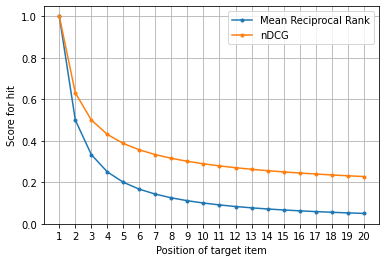

In [23]:
plt.plot(mmr,".-")
plt.plot(ndcg,".-")
plt.grid()
plt.legend(["Mean Reciprocal Rank","nDCG"])
plt.xlabel("Position of target item")
plt.ylabel("Score for hit")
_ = plt.xticks(range(20),np.arange(20)+1)
_ = plt.yticks(np.arange(0,1.1,0.2))